<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(0)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,60.589589,47.924137,79.878954,95.199538,0.429597,294.021816,293.814145,0.207671
1,0.0,1.0,68.204224,91.233157,67.579241,89.329399,1.246329,327.592350,326.704118,0.888231
2,0.0,2.0,42.981227,91.180883,21.305890,92.040546,-1.101691,256.406855,257.868618,-1.461763
3,0.0,3.0,60.902847,59.668501,32.808622,64.857746,1.072183,229.309900,228.444094,0.865806
4,0.0,4.0,67.028579,78.431244,28.913956,75.754792,0.252265,260.380836,260.452277,-0.071441
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,67.265099,22.648191,39.011641,91.091175,-1.033359,228.982747,229.898639,-0.915893
119996,999.0,116.0,75.460454,25.183230,32.971516,88.010631,0.287760,231.913591,231.521348,0.392243
119997,999.0,117.0,24.176393,75.180164,84.243343,77.292641,0.876774,271.769315,270.798947,0.970368
119998,999.0,118.0,31.729336,87.187336,63.249361,39.772438,0.760959,232.699431,231.920638,0.778793


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    60.589589  47.924137  79.878954  95.199538  0.429597  294.021816   
      1.0    68.204224  91.233157  67.579241  89.329399  1.246329  327.592350   
      2.0    42.981227  91.180883  21.305890  92.040546 -1.101691  256.406855   
      3.0    60.902847  59.668501  32.808622  64.857746  1.072183  229.309900   
      4.0    67.028579  78.431244  28.913956  75.754792  0.252265  260.380836   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  67.265099  22.648191  39.011641  91.091175 -1.033359  228.982747   
      116.0  75.460454  25.183230  32.971516  88.010631  0.287760  231.913591   
      117.0  24.176393  75.180164  84.243343  77.292641  0.876774  271.769315   
      118.0  31.729336  87.187336  63.249361  39.772438  0.760959  232.699431   
      119.0  47.113664  55.766474  93.701483  95.285623  0.358590  302.225833   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    293.814145  0.207671  
      1.0    326.704118  0.888231  
      2.0    257.868618 -1.461763  
      3.0    228.444094  0.865806  
      4.0    260.452277 -0.071441  
...                 ...       ...  
999.0 115.0  229.898639 -0.915893  
      116.0  231.521348  0.392243  
      117.0  270.798947  0.970368  
      118.0  231.920638  0.778793  
      119.0  301.833826  0.392007  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    60.589589  47.924137  79.878954  95.199538  0.429597  294.021816   
      1.0    68.204224  91.233157  67.579241  89.329399  1.246329  327.592350   
      2.0    42.981227  91.180883  21.305890  92.040546 -1.101691  256.406855   
      3.0    60.902847  59.668501  32.808622  64.857746  1.072183  229.309900   
      4.0    67.028579  78.431244  28.913956  75.754792  0.252265  260.380836   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  67.265099  22.648191  39.011641  91.091175 -1.033359  228.982747   
      116.0  75.460454  25.183230  32.971516  88.010631  0.287760  231.913591   
      117.0  24.176393  75.180164  84.243343  77.292641  0.876774  271.769315   
      118.0  31.729336  87.187336  63.249361  39.772438  0.760959  232.699431   
      119.0  47.113664  55.766474  93.701483  95.285623  0.358590  302.225833   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    293.814145  0.207671  
      1.0    326.704118  0.888231  
      2.0    257.868618 -1.461763  
      3.0    228.444094  0.865806  
      4.0    260.452277 -0.071441  
...                 ...       ...  
999.0 115.0  229.898639 -0.915893  
      116.0  231.521348  0.392243  
      117.0  270.798947  0.970368  
      118.0  231.920638  0.778793  
      119.0  301.833826  0.392007  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,60.589589,47.924137,79.878954,95.199538,0.429597,294.021816,293.814145,0.207671
1,0.0,1.0,68.204224,91.233157,67.579241,89.329399,1.246329,327.592350,326.704118,0.888231
2,0.0,2.0,42.981227,91.180883,21.305890,92.040546,-1.101691,256.406855,257.868618,-1.461763
3,0.0,3.0,60.902847,59.668501,32.808622,64.857746,1.072183,229.309900,228.444094,0.865806
4,0.0,4.0,67.028579,78.431244,28.913956,75.754792,0.252265,260.380836,260.452277,-0.071441
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,67.265099,22.648191,39.011641,91.091175,-1.033359,228.982747,229.898639,-0.915893
119996,999.0,116.0,75.460454,25.183230,32.971516,88.010631,0.287760,231.913591,231.521348,0.392243
119997,999.0,117.0,24.176393,75.180164,84.243343,77.292641,0.876774,271.769315,270.798947,0.970368
119998,999.0,118.0,31.729336,87.187336,63.249361,39.772438,0.760959,232.699431,231.920638,0.778793


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    60.589589  47.924137  79.878954  95.199538  0.429597  294.021816   
      1.0    68.204224  91.233157  67.579241  89.329399  1.246329  327.592350   
      2.0    42.981227  91.180883  21.305890  92.040546 -1.101691  256.406855   
      3.0    60.902847  59.668501  32.808622  64.857746  1.072183  229.309900   
      4.0    67.028579  78.431244  28.913956  75.754792  0.252265  260.380836   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  67.265099  22.648191  39.011641  91.091175 -1.033359  228.982747   
      116.0  75.460454  25.183230  32.971516  88.010631  0.287760  231.913591   
      117.0  24.176393  75.180164  84.243343  77.292641  0.876774  271.769315   
      118.0  31.729336  87.187336  63.249361  39.772438  0.760959  232.699431   
      119.0  47.113664  55.766474  93.701483  95.285623  0.358590  302.225833   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    293.814145  0.207671  
      1.0    326.704118  0.888231  
      2.0    257.868618 -1.461763  
      3.0    228.444094  0.865806  
      4.0    260.452277 -0.071441  
...                 ...       ...  
999.0 115.0  229.898639 -0.915893  
      116.0  231.521348  0.392243  
      117.0  270.798947  0.970368  
      118.0  231.920638  0.778793  
      119.0  301.833826  0.392007  

[120000 rows x 8 columns]

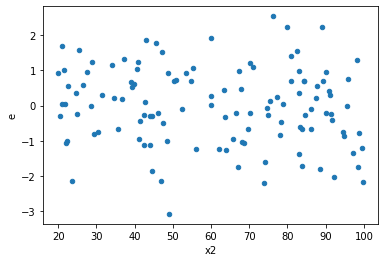

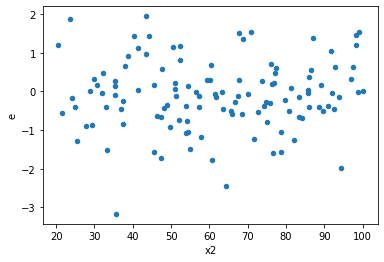

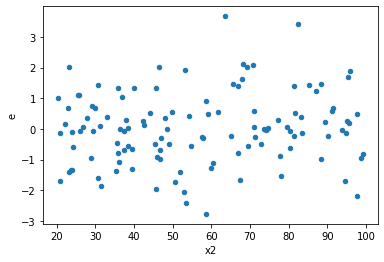

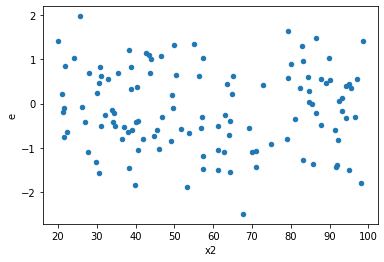

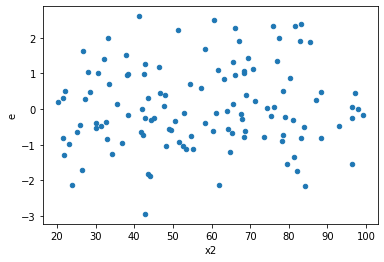

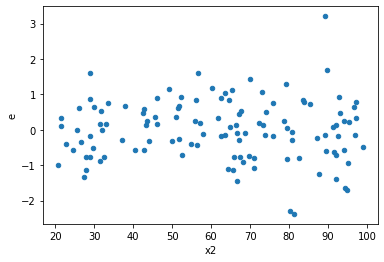

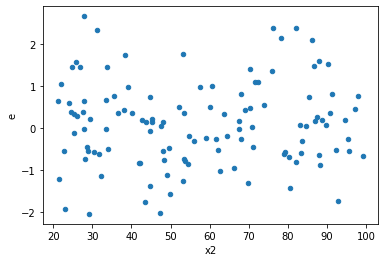

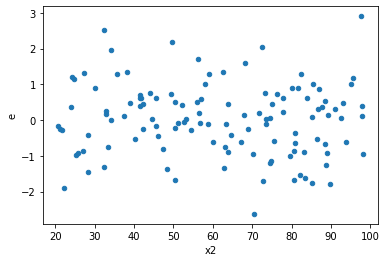

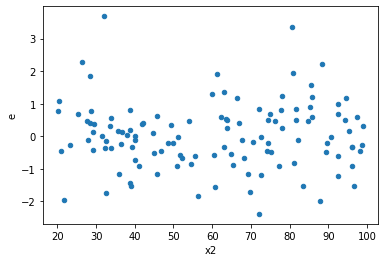

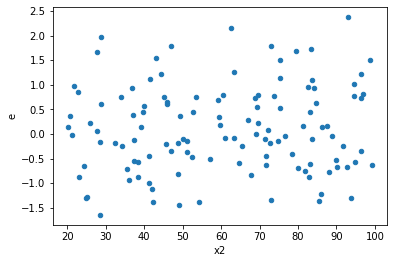

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,50.0,66.0,21733.716436130082,32335.807663201525,434.6743287226016,489.93647974547764,1.127134609456412,0.6435533095821433,0.6782233452089284,0.32177665479107165,Reject005=1 : Homoscedasticity
1.0,66.0,50.0,32485.08986544716,31992.83321510477,492.19833129465394,639.8566643020954,1.2999976302622733,0.3341722030515202,0.8329138984742399,0.1670861015257601,Reject005=1 : Homoscedasticity
2.0,64.0,52.0,30069.343275371906,26771.027187831864,469.83348867768603,514.8274459198435,1.0957657517534347,0.7375114124735676,0.6312442937632162,0.3687557062367838,Reject005=1 : Homoscedasticity
5.0,56.0,60.0,31528.97716744747,35677.956376560345,563.0174494187048,594.6326062760057,1.0561530675291546,0.8335908542052997,0.5832045728973502,0.41679542710264983,Reject005=1 : Homoscedasticity
8.0,53.0,63.0,33374.114056533195,47342.139434987264,629.7002652176075,751.4625307140835,1.1933654346713642,0.4986555662237724,0.7506722168881138,0.2493277831118862,Reject005=1 : Homoscedasticity
9.0,51.0,65.0,27312.38590324267,39256.47161737825,535.5369784949543,603.9457171904346,1.1277385903168307,0.6425908539124592,0.6787045730437704,0.3212954269562296,Reject005=1 : Homoscedasticity
10.0,57.0,59.0,31345.90060753988,33471.93594713935,549.9280808340329,567.3209482565991,1.0316275309967582,0.90482958100354,0.54758520949823,0.45241479050177,Reject005=1 : Homoscedasticity
11.0,57.0,59.0,27084.082908528668,36114.331324328035,475.1593492724328,612.1073105818311,1.2882148094509642,0.33654215963073786,0.8317289201846311,0.16827107981536893,Reject005=1 : Homoscedasticity
19.0,59.0,57.0,23830.410412569738,25970.254125562988,403.9052612299956,455.6184934309296,1.1280330740021904,0.6491758062081487,0.6754120968959256,0.32458790310407437,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,50.0,66.0,21733.716436130082,32335.807663201525,434.6743287226016,489.93647974547764,1.127134609456412,0.6435533095821433,Reject005=1 : Homoscedasticity
1.0,66.0,50.0,32485.08986544716,31992.83321510477,492.19833129465394,639.8566643020954,1.2999976302622733,0.3341722030515202,Reject005=1 : Homoscedasticity
2.0,64.0,52.0,30069.343275371906,26771.027187831864,469.83348867768603,514.8274459198435,1.0957657517534347,0.7375114124735676,Reject005=1 : Homoscedasticity
3.0,61.0,55.0,25585.09178114846,20858.880932915592,419.42773411718787,379.2523805984653,0.9042138841789189,0.6994615145300133,Reject005=1 : Homoscedasticity
4.0,55.0,61.0,35020.348891979265,35152.77342411723,636.7336162178049,576.2749741658562,0.9050487668437034,0.7092896507042158,Reject005=1 : Homoscedasticity
5.0,56.0,60.0,31528.97716744747,35677.956376560345,563.0174494187048,594.6326062760057,1.0561530675291546,0.8335908542052997,Reject005=1 : Homoscedasticity
6.0,55.0,61.0,28013.28046083491,29039.59321097002,509.33237201518017,476.0589050978692,0.9346723892972597,0.80174526167893,Reject005=1 : Homoscedasticity
7.0,63.0,53.0,37340.886531824275,27740.257488248124,592.7124846321313,523.4010846839269,0.8830606714970366,0.6326231583125065,Reject005=1 : Homoscedasticity
8.0,53.0,63.0,33374.114056533195,47342.139434987264,629.7002652176075,751.4625307140835,1.1933654346713642,0.4986555662237724,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      961
Reject005=0 : Heteroscedasticity     39
Name: Result_test, dtype: int64